**Table of contents**<a id='toc0_'></a>    
- 1. [Imports:](#toc1_)    
- 2. [Model description](#toc2_)    
  - 2.1. [Analytical solution](#toc2_1_)    
  - 2.2. [Numerical solution](#toc2_2_)    
- 3. [Further analysis](#toc3_)    
  - 3.1. [Understanding the model - income vs substitution effects](#toc3_1_)    
  - 3.2. [Extension (I) - no income risk](#toc3_2_)    
  - 3.3. [Extension (II) - Stochastic income risk](#toc3_3_)    
  - 3.4. [Extension (III) - preference heterogeneity](#toc3_4_)    
- 4. [Conclusion](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

From hand to... mouth or pocket?
===============================

**Description**

In this project, I...

# 1. <a id='toc1_'></a>[Imports:](#toc0_)

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import utils

# 2. <a id='toc2_'></a>[Model description](#toc0_)

Consider the following simple two-period (subscripts denotes time period) consumer problem with no uncertainty:

$$
\begin{align}
U &= \max_{c_1, c_2} \frac{c_1^{1-\rho}}{1-\rho}+\beta \frac{c_2^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &= (1+r)(m_1-c_1) &\\
c_1 &\in [0, m_1]
\end{align}
$$

- $m_1$ is the cash endowed to a agent in the model. This only happens in period 1.
- $c_i$ denotes the consumption period $i$.
- $r$ is the interest rate
- Utility parameters:
    - $\beta>0$ denotes the discount factor (degree of patience)
    - $\rho>0, \rho\neq1$ is the coefficient of risk aversion.

## 2.1. <a id='toc2_1_'></a>[Analytical solution](#toc0_)

Because we assume that agents have consumed everything by period 2, thus leaving nothing as bequests, we can directly plug in the expression for $c_2$ into our maximization problem. We can then characterize the solution by FOC w.r.t $c_1$: 

**FOC**:

\begin{align*}
c_1^{-\rho}-(1+r)\beta [(1+r)(m_1-c_1)]^{-\rho} &= 0 \leftrightarrow \\
c_1-((1+r)\beta)^{{-\frac{1}{\rho}}} (1+r)(m_1-c_1) &= 0 \leftrightarrow \\
c_1 &= \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} \leftrightarrow \\

c_1(\beta(1+r))^{\frac{1}{\rho}}+(1+r)c_1 &= (1+r)m_1 \leftrightarrow \\

c_1^* &= \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}
\end{align*}

Where by it follows that:

$$
c_2^* = (1+r)\left(m_1 - \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}\right)
$$

## 2.2. <a id='toc2_2_'></a>[Numerical solution](#toc0_)

From line 3, we can analyze the solution numerically, if we treat it as root finding solution:

$$
c_1 - \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} = 0
$$

To do this, I use the (Quasi)-Newton method. It works by...

Let's see the solution for the following parameter values:

- $\rho=5$
- $m_1=1$
- $r=0.05$
- $\beta = 0.95$

In [2]:
rho = 5
m1 = 1
r = 0.05
beta = 0.95

c1_star, c2_star = utils.solve_cons_crra(m1, r, beta, rho)

print(f'The numerical solution to the maximization problem is given by (c1, c2) = ({c1_star:.4f}, {c2_star:.4f}).')

The numerical solution to the maximization problem is given by (c1, c2) = (0.5123, 0.5121)


# 3. <a id='toc3_'></a>[Further analysis](#toc0_)
## 3.1. <a id='toc3_1_'></a>[Understanding the model - income vs substitution effects](#toc0_)

Let us know dive a little into the mechanics of this model. The common terms 'substitution' and 'income' effect gets thrown around a lot in economic maximization problems. They are easily mistaken for each other.

Consider a range of values for the interest rate $r$ for $\rho = 0.5, 0.99, 10$.

Text(0.5, 0.01, 'Interest rate, $r$')

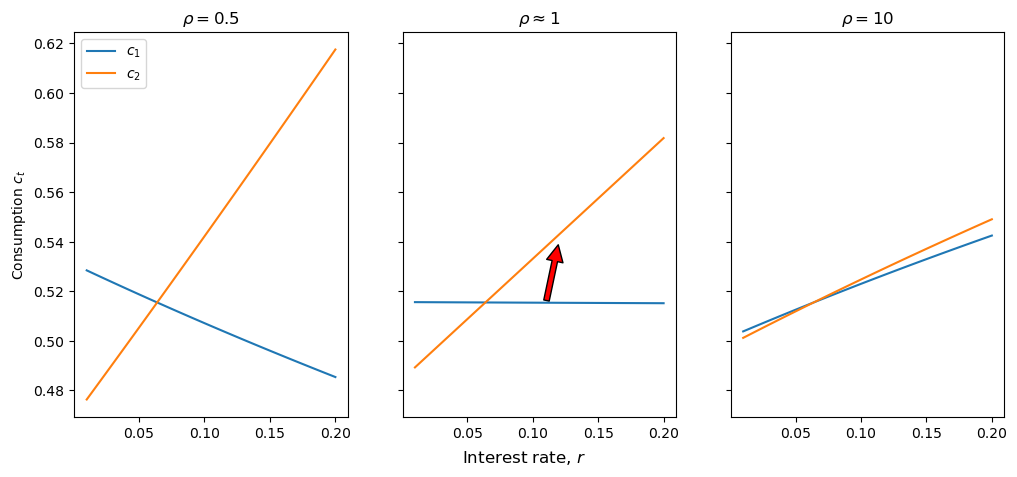

In [113]:
# Defining grids of different values of the interest rate
r_grid = np.linspace(0.01, 0.20, 100)
rho_low = 0.5
rho_one = 0.99
rho_high = 10

# Same parameters as above
m1 = 1
r = 0.05
beta = 0.95

# Defining grids consumption in period 1 & 2
c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_one = np.empty(100)
c2_grids_one = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

# Solving numerically the optimal amount of consumption in period 1 & 2
for i, r in enumerate(r_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r, beta, rho_low)

    c1_grids_one[i], c2_grids_one[i] = utils.solve_cons_crra(m1, r, beta, rho_one)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r, beta, rho_high)

# Plotting our results
fig, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True)
ax[0].plot(r_grid, c1_grids_low, label='$c_1$')
ax[0].plot(r_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$\rho=0.5$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(r_grid, c1_grids_one, label='$c_1$')
ax[1].plot(r_grid, c2_grids_one, label='$c_2$')
ax[1].set_title(r'$\rho\approx 1$')

ax[2].plot(r_grid, c1_grids_high, label='$c_1$')
ax[2].plot(r_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$\rho = 10$')

# Adding an arrow to the middle plot 
arrow_start = (0.11, 0.515)
arrow_end = (0.12, 0.54)
ax[1].annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(facecolor='red', shrink=0.05))

fig.supxlabel(r'Interest rate, $r$')

Text(0.5, 0.01, 'Coefficient of risk aversion $\\rho$')

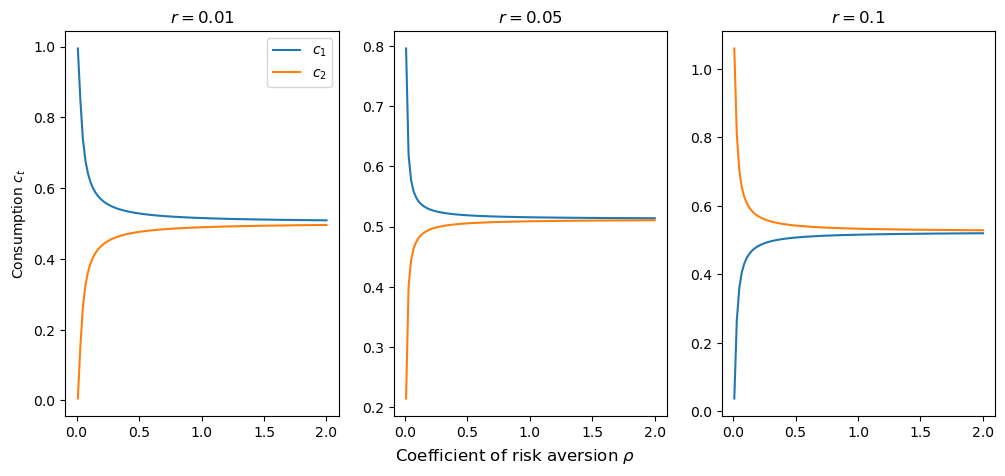

In [114]:
# Defining grids of possible rho values
rho_grid = np.linspace(0.01, 2, 100)
r_low = 0.01
r_med = 0.05
r_high = 0.1

# Defining grids consumption in period 1 & 2
c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_med = np.empty(100)
c2_grids_med = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

# Solving numerically the optimal amount of consumption in period 1 & 2
for i, rho in enumerate(rho_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r_low, beta, rho)

    c1_grids_med[i], c2_grids_med[i] = utils.solve_cons_crra(m1, r_med, beta, rho)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r_high, beta, rho)

fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].plot(rho_grid, c1_grids_low, label='$c_1$')
ax[0].plot(rho_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$r=0.01$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(rho_grid, c1_grids_med, label='$c_1$')
ax[1].plot(rho_grid, c2_grids_med, label='$c_2$')
ax[1].set_title(r'$r=0.05$')

ax[2].plot(rho_grid, c1_grids_high, label='$c_1$')
ax[2].plot(rho_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$r = 0.1$')
fig.supxlabel(r'Coefficient of risk aversion $\rho$')


|               | Scenario 1 | Scenario 2 | Scenario 3 |
|--             |:----------:|:----------:|:----------:|
| Income risk | No risk | Stochastic risk  | Stochastic risk |
| Preferences | Homogenous, with bequests | Homogenous, with bequests | Heterogenous, with bequests |

## 3.2. <a id='toc3_2_'></a>[Extension (I) - no income risk](#toc0_)

Consider the following model.

Period 2:

$$
\begin{align}
v_2(m_2) &= \max_{c_2} \frac{c_2^{1-\rho}}{1-\rho}+\gamma\frac{(m_2-c_2+\kappa)^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &\in [0, m_2]
\end{align}
$$

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= (1+r)(m_1-c_1)+y_2 \\
y_2 &= 1 \\
c_1&\in [0,m_1]
\end{aligned}
$$

## 3.3. <a id='toc3_3_'></a>[Extension (II) - Stochastic income risk](#toc0_)

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= \begin{cases}
(1+r)(m_1-c_1)*(1-\boldsymbol{\sigma}) & \text{with prob. }0.5\\
(1+r)(m_1-c_1)*(1+\boldsymbol{\sigma}) & \text{with prob. }0.5 
\end{cases}\\
c_1&\in [0,m_1]
\end{aligned}
$$

Where $\boldsymbol{\sigma}\stackrel{d}{\sim}\mathcal{U}(0.05,0.95).$

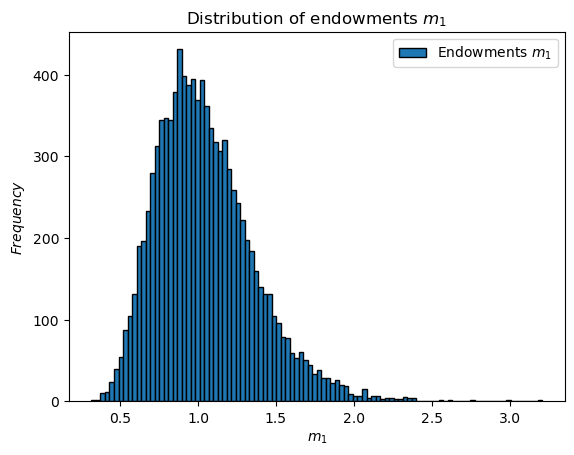

In [98]:
seed = np.random.seed(1337)
N = 10_000

m1_rand = np.random.lognormal(0,.3,size=N)

fig,ax = plt.subplots()
ax.hist(m1_rand, bins=100, label='Endowments $m_1$')
ax.set_xlabel('$m_1$')
ax.set_ylabel('$Frequency$')
ax.set_title('Distribution of endowments $m_1$')
ax.legend()

In [7]:
def v1_func_no_risk(c1, m1, rho, beta, r,  v2_interp_func):

    y2=1
    m2 = (1+r)*(m1-c1)+y2

    exp_v2 = v2_interp_func([m2])[0]

    return utils.utility_crra(c1, rho) + beta*exp_v2

In [94]:
rho = 4
kappa = 1.5
gamma = 0.5
beta = 0.95
r = 0.05


# No risk
m1_grid_no_risk, c1_grid_no_risk, m2_grid_no_risk, c2_grid_no_risk = utils.solvez_no_risk(rho=rho, kappa=kappa, gamma=gamma, beta=beta, r=r, v1=v1_func_no_risk)

c1_interp_no_risk = utils.interp(m1_grid_no_risk, c1_grid_no_risk)
c2_interp_no_risk = utils.interp(m2_grid_no_risk, c2_grid_no_risk)


# period 1 - no risk 
sim_c1_no_risk = c1_interp_no_risk(m1_rand)
sim_a1_no_risk = m1_rand-sim_c1_no_risk

# stochastic risk
p=0.5

sigma_low = 0.05
sigma_high = 0.95

m1_grid_stoch_risk, c1_grid_stoch_risk, m2_grid_stoch_risk, c2_grid_stoch_risk = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

c1_interp_stoch_risk = utils.interp(m1_grid_stoch_risk, c1_grid_stoch_risk)
c2_interp_stoch_risk = utils.interp(m2_grid_stoch_risk, c2_grid_stoch_risk)

# period 1 - no risk 
sim_c1_stoch_risk = c1_interp_stoch_risk(m1_rand)
sim_a1_stoch_risk = m1_rand-sim_c1_stoch_risk

In [95]:
y_45 = np.linspace(0, 4, 300)
x_45 = np.linspace(0, 4, 300)

(0.0, 4.0)

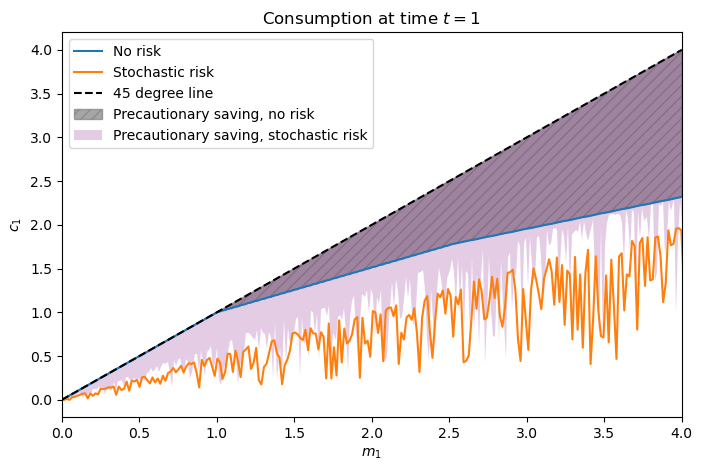

In [96]:
fig,ax = plt.subplots(figsize=(8,5))

ax.plot(m1_grid_no_risk, c1_grid_no_risk, label='No risk')
ax.plot(m1_grid_stoch_risk, c1_grid_stoch_risk, label='Stochastic risk')
ax.plot(y_45, x_45, label='45 degree line', linestyle='--', color='k')

# Fill between the 45-degree line and the "No risk" line
ax.fill_between(y_45, y_45, c1_grid_no_risk, color='gray', alpha=0.7, label='Precautionary saving, no risk', hatch='///')

# Fill between the 45-degree line and the "Stochastic risk" line
ax.fill_between(y_45, y_45, c1_grid_stoch_risk, fc='purple', alpha=0.2, label='Precautionary saving, stochastic risk', snap=True)

ax.legend()
ax.set_xlabel('$m_1$')
ax.set_ylabel('$c_1$')
ax.set_title('Consumption at time $t=1$')
ax.set_xlim(0,4)

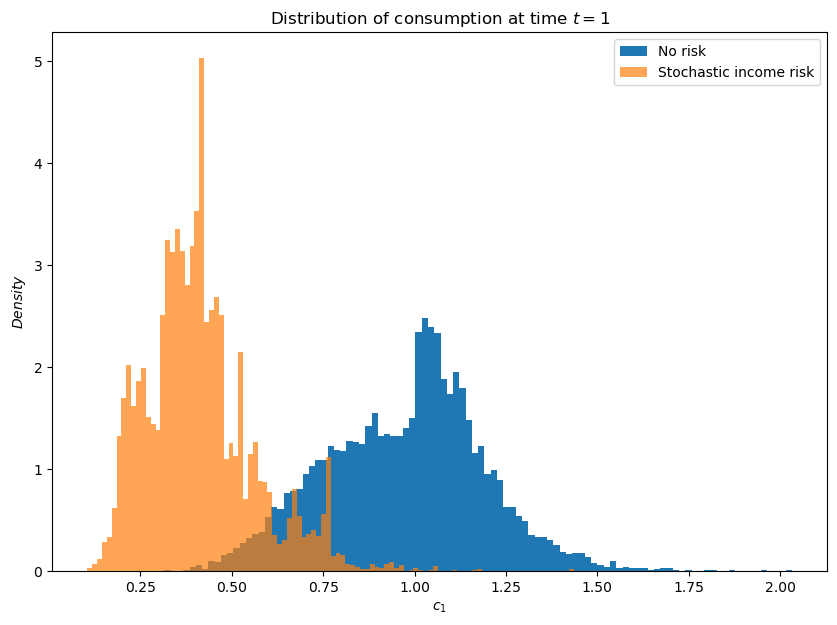

In [97]:
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(sim_c1_no_risk, density=True, bins=100, label='No risk')
ax.hist(sim_c1_stoch_risk, density=True, bins=100, label='Stochastic income risk', alpha=0.7)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$Density$')
ax.set_title('Distribution of consumption at time $t=1$')
ax.legend()

## 3.4. <a id='toc3_4_'></a>[Extension (III) - preference heterogeneity](#toc0_)

Note here that subscript $i$ denotes agent "type".

Period 2:

$$
\begin{align}
v_2(m_2) &= \max_{c_2} \frac{c_2^{1-\rho}}{1-\rho}+\boldsymbol{\gamma}_i \frac{(m_2-c_2+\kappa)^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &\in [0, m_2]
\end{align}
$$

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= \begin{cases}
(1+r)(m_1-c_1)*(1-\boldsymbol{\sigma_i}) & \text{with prob. }\boldsymbol{p}_i\\
(1+r)(m_1-c_1)*(1+\boldsymbol{\sigma_i}) & \text{with prob. }1-\boldsymbol{p}_i 
\end{cases}\\
c_1&\in [0,m_1]
\end{aligned}
$$

Where:

$$
\begin{aligned}
    \boldsymbol{\sigma}_i&= 
\begin{cases}
\sigma_A\stackrel{d}{\sim}\mathcal{U}(0.05,0.95) & \text{For type }A\\
\sigma_B\stackrel{d}{\sim}\mathcal{U}(0.1,0.5) & \text{For type }B
\end{cases}\\
    \boldsymbol{\gamma}_i&=
\begin{cases}
\gamma_A&=5 & \text{For type }A\\
\gamma_B&=0.1 & \text{For type }B
\end{cases}\\
    \boldsymbol{p}_i&=
\begin{cases}
    p_A &= 0.3 & \text{For type }A\\
    p_B &= 0.6 & \text{For type }B
\end{cases}
\end{aligned}
$$

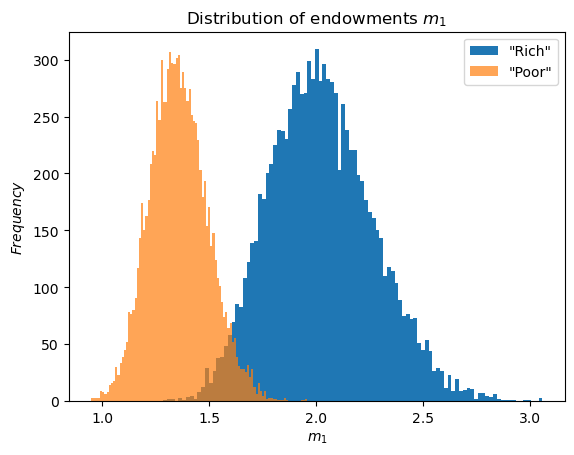

In [79]:
m1_rand_rich = np.random.lognormal(.7,.12,size=N)
m1_rand_poor = np.random.lognormal(0.3,0.1,size=N)

fig,ax = plt.subplots()
ax.hist(m1_rand_rich, bins=100, label='"Rich"')
ax.hist(m1_rand_poor, bins=100, label='"Poor"', alpha=0.7)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$Frequency$')
ax.set_title('Distribution of endowments $m_1$')
ax.legend()

In [109]:
rho = 4
kappa = 1.5
gamma_rich = 5
beta=0.94
r = 0.05
delta = 0.5
p=0.3

sigma_low = 0.05
sigma_high = 0.95

m1_grid_rich, c1_grid_rich, m2_grid_rich, c2_grid_rich = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma_rich, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

c1_interp_rich = utils.interp(m1_grid_rich, c1_grid_rich)
c2_interp_rich = utils.interp(m2_grid_rich, c2_grid_rich)

# period 1
sim_c1_rich = c1_interp_rich(m1_rand_rich)
sim_a1_rich = m1_rand_rich-sim_c1_rich

# period 2
sim_m2_rich = (1+r)*sim_a1_rich

# period 2
sim_c2_rich = c2_interp_rich(sim_m2_rich)

sigma_low = 0.1
sigma_high = 0.5
gamma_poor = 0.1
p=0.6

m1_grid_poor, c1_grid_poor, m2_grid_poor, c2_grid_poor = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma_poor, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

c1_interp_poor = utils.interp(m1_grid_poor, c1_grid_poor)
c2_interp_poor = utils.interp(m2_grid_poor, c2_grid_poor)

# period 1
sim_c1_poor = c1_interp_poor(m1_rand_poor)
sim_a1_poor = m1_rand_poor-sim_c1_poor

# period 2
sim_m2_poor = (1+r)*sim_a1_poor

# period 2
sim_c2_poor = c2_interp_poor(sim_m2_poor)

# share
share_rich=sim_c1_rich/(sim_c1_rich+sim_c2_rich)
share_poor=sim_c1_poor/(sim_c1_poor+sim_c2_poor)

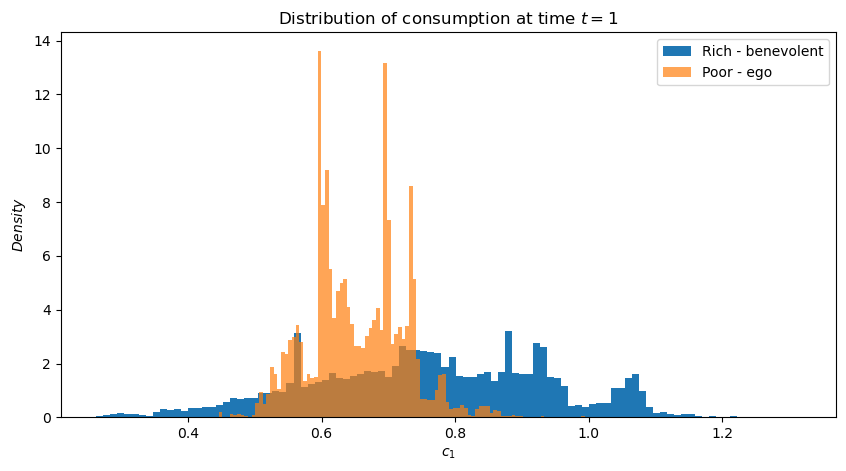

In [110]:
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(sim_c1_rich, density=True, bins=100, label='Rich - benevolent')
ax.hist(sim_c1_poor, density=True, bins=100, label='Poor - ego', alpha=0.7)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$Density$')
ax.set_title('Distribution of consumption at time $t=1$')
ax.legend()

# 4. <a id='toc4_'></a>[Conclusion](#toc0_)